In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

### Initialize data clusters from sklearn and split train, test data

In [3]:
from sklearn import datasets
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)


In [238]:
print('X (Features): \n', X)
print('y (Label): \n', y)

X (Features): 
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  

### Define Functions 

In [ ]:
def euclidean_distance(x1,x2)
    return np.sqrt(np.sum((x1-x2)**2))

In [232]:
def KNearestNeighbor(X_train, y_train, X_test, k):
    #create container for predicted labels
    pred_label = []
    
    for i in range(len(X_test)):
        #calculate Euclidean Distance for each point in test set
        distances = [euclidean_distance(X_test[i], X_train_) for X_train_ in X_train]

        #identify position of k-nearest neighbors in train feature data
        k_position = np.argpartition(distances, range(k))[:k]

        #create list of labels for closest k-neighbors
        mode_k_label = [y_train[i] for i in k_position]

        #Find most common label (can this be more succinct?)
        values, counts = np.unique(mode_k_label, return_counts=True)
        counts_mode = values[counts.argmax()]
        pred_label.append(counts_mode)
    return pred_label

In [241]:
def odd(n):
    return list(range(1, 2*n, 2))

### Plot results / visualize

#### Sensitivity Analysis: k parameter 

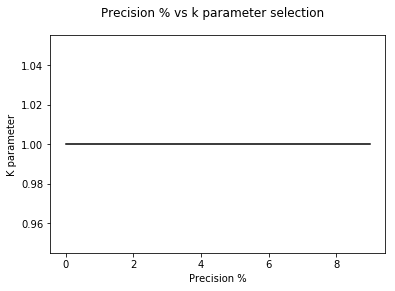

In [282]:
#only odd values of k are considered to avoid ties when calculating mode of k_neighbor labels

y_test_len = np.size(y_test)
result = []

for i in odd(10):
    predicted_labels = KNearestNeighbor(X_train, y_train, X_test, i)
    precision_pcnt = (y_test_len - np.count_nonzero(y_test-predicted_labels))/y_test_len
    result.append(precision_pcnt)

#Plot 
fig.clf()
fig, ax = plt.subplots()

ax.plot(result, color = 'black', label = 'Precision %')


#Define labels, legend 
fig.suptitle('Precision % vs k parameter selection' , fontsize=12)
plt.xlabel('Precision %', fontsize=10)
plt.ylabel('K parameter', fontsize=10)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           ncol=2, fancybox=True, shadow=False)

plt.show()

#### Seperate two dimentional feature vector example
(so we can easily visualize)

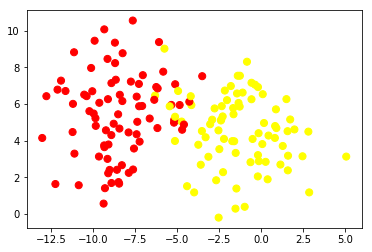

In [406]:
X, y = make_blobs(n_samples=160, centers=2,
                  random_state=7, cluster_std=2.20)

fig, ax = plt.subplots(1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plt.show()

y = np.where(y == 0, -1, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=1111)


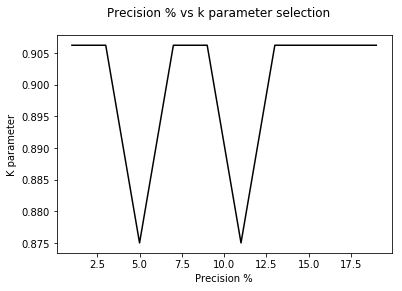

In [411]:

#only odd values of k are considered to avoid ties when calculating mode of k_neighbor labels

y_test_len = np.size(y_test)
result = []

for i in odd(10):
    predicted_labels = KNearestNeighbor(X_train, y_train, X_test, i)
    precision_pcnt = (y_test_len - np.count_nonzero(y_test-predicted_labels))/y_test_len
    result.append(precision_pcnt)

#Plot 
fig.clf()
fig, ax = plt.subplots()

ax.plot(odd(10), result, color = 'black', label = 'Precision %')


#Define labels, legend 
fig.suptitle('Precision % vs k parameter selection' , fontsize=12)
plt.xlabel('Precision %', fontsize=10)
plt.ylabel('K parameter', fontsize=10)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           ncol=2, fancybox=True, shadow=False)

plt.show()

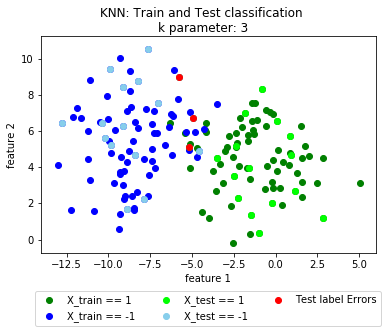

In [417]:
#call SVM function
k=3
Y_pred = KNearestNeighbor(X_train, y_train, X_test, k)

#Create single array to slice from
y_ = np.array([y.tolist()])
Xy = np.concatenate((X,y_.T), axis=1)
Y_pred_ = np.array(Y_pred)[:,None]
Xy_pred = np.concatenate((X_test, Y_pred_), axis=1)

#Plot 
fig, ax = plt.subplots(1)
ax.scatter(Xy[np.where(Xy[:,2] == 1)][:,0], Xy[np.where(Xy[:,2] == 1)][:,1], color='green', label = 'X_train == 1')
ax.scatter(Xy[np.where(Xy[:,2] == -1)][:,0], Xy[np.where(Xy[:,2] == -1)][:,1], color='blue', label = 'X_train == -1')

ax.scatter(Xy_pred[np.where(Xy_pred[:,2] == 1)][:,0], Xy_pred[np.where(Xy_pred[:,2] == 1)][:,1], color='lime', label = 'X_test == 1')
ax.scatter(Xy_pred[np.where(Xy_pred[:,2] == -1)][:,0], Xy_pred[np.where(Xy_pred[:,2] == -1)][:,1], color='skyblue', label = 'X_test == -1')

tmp = (y_test-Y_pred)
test_errors = np.concatenate((X_test,tmp[:,None]), axis=1)
ax.scatter(test_errors[np.where(test_errors[:,2] != 0)][:,0], test_errors[np.where(test_errors[:,2] != 0)][:,1], color='red', label = 'Test label Errors')


#Define labels, legend 
fig.suptitle('KNN: Train and Test classification \nk parameter: %0.0f' %(k), fontsize=12)
plt.xlabel('feature 1', fontsize=10)
plt.ylabel('feature 2', fontsize=10)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=3, fancybox=True, shadow=False)

plt.show()